<img style="float: left;" src="images/kansas.png" alt="UoE" height="50px" width="1050px"/>

In [1]:
# Initial set-up
%matplotlib notebook
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import HBox
from IPython.display import HTML, display
from src.pminterface import pminterface
from src import Model, View
print ("You are now ready to continue the practical")

You are now ready to continue the practical


In [2]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: none;
}
</style>

## INTRODUCTION
<br>
Penman-Monteith Equation
<br>
$ \Large LE = \frac{\Delta R_n + \frac{\rho c_p (e_z - e_s)}{r_a}}{\Delta + \gamma(1+\frac{r_c}{r_a})}$
<br>  
where:  
<br>
$ \large R_n$ = net radiation (W m$^{-2}$)
<br>
$\large \Delta$ = slope of saturation vapor pressure curve (hPa$\, ^{\circ}$C$^{-1}$)
<br>
$\large \rho$ = density of air (kg m$^{-3}$)
<br>
$\large c_p$ = specific heat of air (j kg$^{-1}$ $^{\circ}$C$^{-1}$)
<br>
$\large e_z$ = vapour pressure in air (hPa) at height $z$
<br>
$\large e_s$ = vapour pressure at surface (hPa)
<br>
$\large r_a$ = aerodynamic resistance (s m$^{-1}$)
<br>
$\large r_c$ = canopy resistance or bulk stomatal resistance (s m$^{-1}$)
<br>
$\large \gamma$ = pyschrometric constant (0.066 hPa $^{\circ}$C$^{-1}$)
<br>

Start by defining a simple function just to test the simulation is available and working. The parameters are:
- $irradiance:$ irradiance
- $air T:$ air temperature
- $u:$ windspeed
- $vp:$ vapour pressure
- $r_c:$ canopy resistance

$\Large R_n=(1-\alpha)Q_t + L_w^{\downarrow} \,+L_w^{\uparrow} = H + LE + G$

<img style="float: left;" src="images/MORECS_SMD_Aug_2018.png" alt="UoE" height="50px" width="450px"/>
<img style="float: right;" src="images/Surface_resistance_cereals.png" alt="UoE" height="50px" width="450px"/></br>
And scenes like this (a field of wheat in central England in Aug 2018) were common across the country.</br>
<img style="float: left;" src="images/drought_wheat.png" alt="UoE" height="50px" width="450px"/>

| Surface type | Albedo   | Height (m) | Minimum surface resistance ($s \ m ^{-1}$) |
|--------------|----------|------------|----------------------------|
| Grass        | 0.25     | 0.15       | 40                         |
| Cereals      | 0.25     | 0.05-0.8   | 40                         |
| Potatoes     | 0.25     | 0.05-0.6   | 40                         |
| Sugar beet   | 0.25     | 0.05-0.35  | 40                         |
| Oilseed rape | 0.25     | 0.05-0.35  | 40                         |
| Conifers     | 0.12     | 10         | 70                         |
| Deciduous    | 0.12     | 2 - 10     | 80                         |
| Upland       | 0.25     | 0.15       | 110                        |
| Orchards     | 0.25     | 0.15-0.30  | 40-80                      |
| Bare soil    | 0.05-0.3 | 0.05       | 100                        |
| Water        | 0.05     | 0.005      | 0                          |

<IPython.core.display.Javascript object>


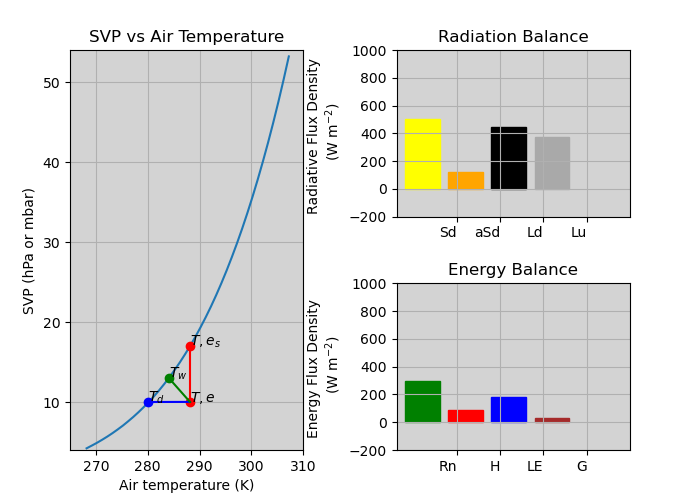

In [3]:
fd = pminterface()                      # Create some selection boxes
mod = Model.Model(fd.inpt)           # Create the Model
# First set the bulk canopy resistance based on the soil moisture deficit
widgets.VBox(children=[fd.h0,fd.h1,fd.h2,fd.h3])    # Display the weather options